In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:\\Users\\user\\2024_ai_test\\data\\HW3\\student-mat.csv", sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [19]:
df['G3'].value_counts()#데이터 불균형이 다소 보임

G3
10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64

In [20]:
df.isnull().sum() #결측치 없음

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [21]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [22]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
#문자열 데이터 전처리
df['school']=df['school'].replace({'GP': 0, 'MS': 1})
df['sex']=df['sex'].replace({'M': 0, 'F': 1})
df['address']=df['address'].replace({'U': 0, 'R': 1})
df['famsize']=df['famsize'].replace({'LE3': 0, 'GT3': 1})
df['Pstatus']=df['Pstatus'].replace({'T': 0, 'A': 1})
df['Mjob']=df['Mjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
df['Fjob']=df['Fjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
df['reason']=df['reason'].replace({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
df['guardian']=df['guardian'].replace({'mother': 0, 'father': 1, 'other': 2})
df['schoolsup']=df['schoolsup'].replace({'yes': 0, 'no': 1})
df['famsup']=df['famsup'].replace({'yes': 0, 'no': 1})
df['paid']=df['paid'].replace({'yes': 0, 'no': 1})
df['activities']=df['activities'].replace({'yes': 0, 'no': 1})
df['nursery']=df['nursery'].replace({'yes': 0, 'no': 1})
df['higher']=df['higher'].replace({'yes': 0, 'no': 1})
df['internet']=df['internet'].replace({'yes': 0, 'no': 1})
df['romantic']=df['romantic'].replace({'yes': 0, 'no': 1})
df['G1']=pd.to_numeric(df['G1'])
df['G2']=pd.to_numeric(df['G2'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


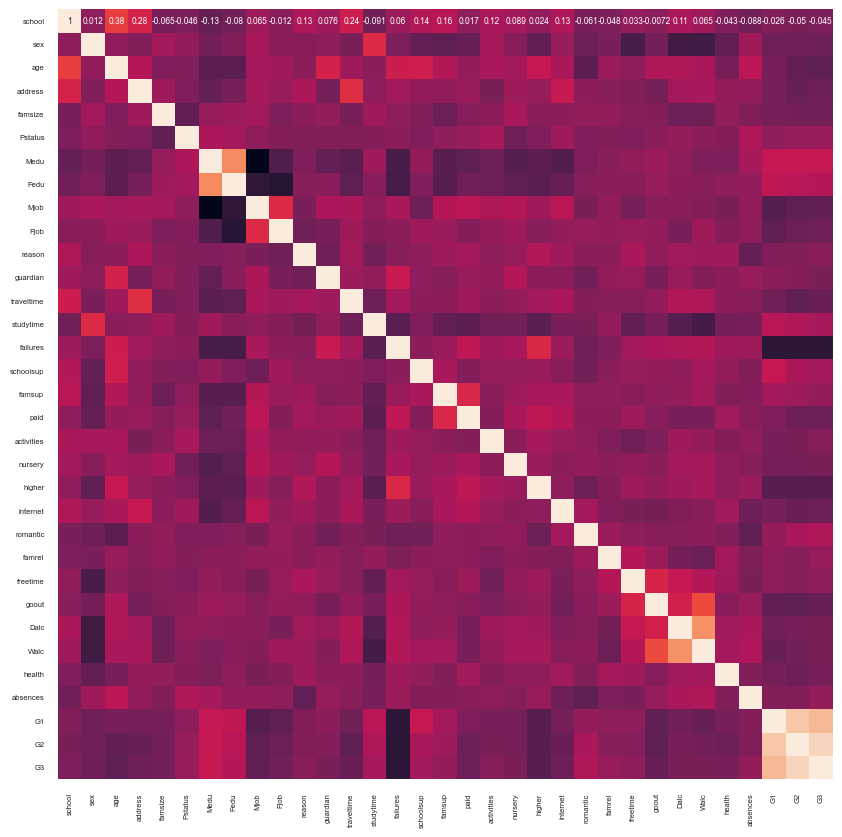

In [38]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.5)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [45]:
X=df.drop('G3', axis=1)
X_2=df[['G1', 'G2']]#상위 2개 feature selection
X_7=df[['G1', 'G2', 'romantic', 'schoolsup', 'studytime', 'Medu', 'Fedu']]#상위 7개 feature selection
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,18,0,1,1,4,4,3,0,...,1,4,3,4,1,1,3,6,5,6
1,0,1,17,0,1,0,1,1,3,4,...,1,5,3,3,1,1,3,4,5,5
2,0,1,15,0,0,0,1,1,3,4,...,1,4,3,2,2,3,3,10,7,8
3,0,1,15,0,1,0,4,2,1,2,...,0,3,2,2,1,1,5,2,15,14
4,0,1,16,0,1,0,3,3,4,4,...,1,4,3,2,1,2,5,4,6,10


In [46]:
y=df[['G3']]
y.head()

,G3
0,6
1,6
2,10
3,15
4,10


In [47]:
#전체 결과
print("1. 전체 데이터")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

##################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

1. 전체 데이터
(316, 32) (316, 1)
(79, 32) (79, 1)
평균제곱근오차 5.519024315153227


In [49]:
#2-feature selection
print("2. 2-feature selection 'G1', 'G2'")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_2,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

##################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

2. 2-feature selection 'G1', 'G2'
(316, 2) (316, 1)
(79, 2) (79, 1)
평균제곱근오차 4.392394731819329


In [50]:
#7-feature selection
print("3. 7-feature selection 'G1', 'G2', 'romantic', 'schoolsup', 'studytime', 'Medu', 'Fedu'")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_7,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

##################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

3. 7-feature selection 'G1', 'G2', 'romantic', 'schoolsup', 'studytime', 'Medu', 'Fedu'
(316, 7) (316, 1)
(79, 7) (79, 1)
평균제곱근오차 4.564661575008072


In [51]:
print("놀랍게도 G1, G2 2-feature selection의 결과가 전체 결과보다 좋게 나온 것을 알 수 있다.")

놀랍게도 G1, G2 2-feature selection의 결과가 전체 결과보다 좋게 나온 것을 알 수 있다.
